<h1 style="color: DarkBlue">Recommendation-System:</h1>
<p> create a system that takes movie ratings as input and provides movie recommendations based on those ratings. The system should be able to analyze the user’s movie ratings and provide recommendations based on the user’s preferences</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
movies = pd.read_csv(r"E:\Projects Datas\Movie Recomendation\movies.csv")
ratings = pd.read_csv(r"E:\Projects Datas\Movie Recomendation\ratings.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
data = pd.merge(movies,ratings,on='movieId')

In [7]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [9]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [10]:
data.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


<ul>
    <li> ratings 1 to 5 </li>
    <li> There are a total of 100,836 ratings in the dataset.</li>
    <li> 610 unique useres provide ratings for movies </li>
</ul>

In [11]:
#no of movies
data.movieId.nunique()

9724

In [12]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

In [13]:
data['date'] =  pd.to_datetime(data['timestamp'].dt.date)
data['time'] = data['timestamp'].dt.time
data.drop('timestamp',axis = 1,inplace = True)

In [14]:
data.head()

,movieId,title,genres,userId,rating,date,time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30,18:45:03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08,06:36:02
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25,06:52:26
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13,12:59:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18,05:28:03


In [15]:
data.dtypes

movieId             int64
title              object
genres             object
userId              int64
rating            float64
date       datetime64[ns]
time               object
dtype: object

In [16]:
data['date'].dt.year.min()

1996

In [17]:
data['date'].dt.year.max()

2018

Dataset covering the years 1996 to 2018.

In [18]:
gen =  data[['movieId', 'genres']].drop_duplicates()

In [19]:
generes = pd.DataFrame(gen['genres'].apply(lambda x: x.split('|')))

In [20]:
data_new = generes.explode('genres').reset_index(drop=True)
data_generes = data_new.genres.unique()

In [21]:
data_generes

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [22]:
genres_count = data_new.genres.value_counts()

In [23]:
genres_count

Drama                 4349
Comedy                3753
Thriller              1889
Action                1828
Romance               1591
Adventure             1262
Crime                 1196
Sci-Fi                 980
Horror                 977
Fantasy                778
Children               664
Animation              610
Mystery                573
Documentary            438
War                    381
Musical                333
Western                167
IMAX                   158
Film-Noir               85
(no genres listed)      34
Name: genres, dtype: int64

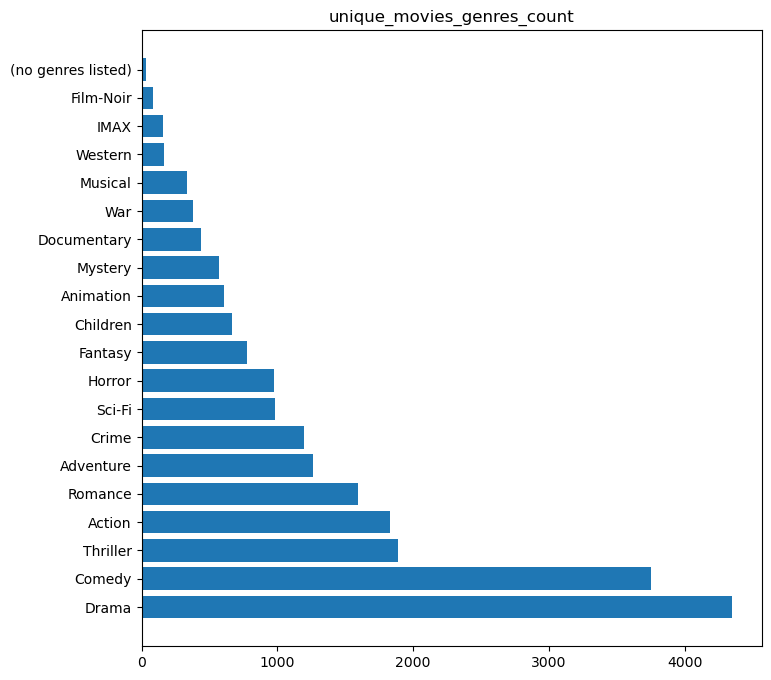

In [24]:
plt.figure(figsize=(8,8))
plt.barh(genres_count.index,width=genres_count)
plt.title('unique_movies_genres_count')
plt.show()

In [25]:
data.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [26]:
data.head()

,movieId,title,genres,userId,rating,date,time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30,18:45:03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08,06:36:02
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25,06:52:26
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13,12:59:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18,05:28:03


In [27]:
user_review_counts = data['userId'].value_counts()
user_review_counts.tail(10)

257    20
595    20
569    20
406    20
576    20
53     20
207    20
431    20
442    20
189    20
Name: userId, dtype: int64

<h3 style="color: Seagreen">Ratings From Users</h3>

In [28]:
def get_user_input():
    movie_names = []
    movie_ratings = []

    print("Enter movie names and ratings. Press 'Enter' without typing a movie name to finish.")

    while True:
        movie_name = input("Enter movie name: ")
        if movie_name == "":
            break

        movie_rating = float(input("Enter movie rating (0-5): "))
        if movie_rating < 0 or movie_rating > 5:
            print("Invalid rating. Please enter a rating between 0 and 5.")
            continue

        movie_names.append(movie_name)
        movie_ratings.append(movie_rating)

    return movie_names, movie_ratings

user_movie_names, user_movie_ratings = get_user_input()
print("Movie names:", user_movie_names)
print("Movie ratings:", user_movie_ratings)


Enter movie names and ratings. Press 'Enter' without typing a movie name to finish.
Enter movie name: Toy Story (1995)
Enter movie rating (0-5): 4
Enter movie name: Iron Man (2008)
Enter movie rating (0-5): 5
Enter movie name: 
Movie names: ['Toy Story (1995)', 'Iron Man (2008)']
Movie ratings: [4.0, 5.0]


<h2 style="color: DarkBlue">Recommendation-System: using Corrilation</h2>

In [47]:
pivot_table = pd.pivot_table(data, values='rating', index='userId', columns='title')
pivot_table

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [48]:
def movie_correlation(movie_title, n=10) :
    movie_rating = pivot_table[movie_title]
    similar_to_movie = pivot_table.corrwith(movie_rating)
    corr_ = pd.DataFrame(similar_to_movie, columns = ['correlation'])
    corr_.dropna(inplace=True)
    return corr_.sort_values(by = 'correlation',ascending=False).head(n)

In [49]:
movie_correlation('Toy Story (1995)')

,correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
Brigadoon (1954),1.0
Project X (1987),1.0
Imitation of Life (1959),1.0
Terminal Velocity (1994),1.0


In [50]:
movie_correlation('Jumanji (1995)', n = 10)

,correlation
title,
Paper Towns (2015),1.0
"Ice Storm, The (1997)",1.0
Stealing Beauty (1996),1.0
"Man Who Would Be King, The (1975)",1.0
Outlander (2008),1.0
Anywhere But Here (1999),1.0
Carnage (2011),1.0
Carpool (1996),1.0
"Illusionist, The (L'illusionniste) (2010)",1.0


In [51]:
similarity = pivot_table.corrwith(pivot_table['Jumanji (1995)'])
corrlated_movies=similarity.reset_index().rename(columns={0:'corrolation'}).sort_values(by='corrolation',ascending=False)
corrlated_movies.dropna(inplace=True)
corrlated_movies

,title,corrolation
6452,Paper Towns (2015),1.0
4236,"Ice Storm, The (1997)",1.0
8031,Stealing Beauty (1996),1.0
5396,"Man Who Would Be King, The (1975)",1.0
6397,Outlander (2008),1.0
...,...,...
7703,"Simpsons: The Longest Daycare, The (2012)",-1.0
5401,"Man from Earth, The (2007)",-1.0
3607,"Great Beauty, The (Grande Bellezza, La) (2013)",-1.0
8916,Trial and Error (1997),-1.0


In [52]:
data['total_rate_count'] = data.groupby('title')['rating'].transform('count')

In [53]:
data.head()

,movieId,title,genres,userId,rating,date,time,total_rate_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30,18:45:03,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08,06:36:02,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25,06:52:26,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13,12:59:30,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18,05:28:03,215


In [54]:
df = data.groupby(['title','movieId']).agg({'rating':'mean','total_rate_count':'count'}).reset_index().rename(columns={'rating':'average_rating'})
df

,title,movieId,average_rating,total_rate_count
0,'71 (2014),117867,4.000000,1
1,'Hellboy': The Seeds of Creation (2004),97757,4.000000,1
2,'Round Midnight (1986),26564,3.500000,2
3,'Salem's Lot (2004),27751,5.000000,1
4,'Til There Was You (1997),779,4.000000,2
...,...,...,...,...
9719,eXistenZ (1999),2600,3.863636,22
9720,xXx (2002),5507,2.770833,24
9721,xXx: State of the Union (2005),33158,2.000000,5
9722,¡Three Amigos! (1986),2478,3.134615,26


In [55]:
recomended  = pd.merge(df,corrlated_movies,on='title')
recomended  = recomended.sort_values(by='corrolation',ascending=False)[1:11]
recomended  =dict(zip(recomended['movieId'], recomended['title']))
recomended

{4912: 'Funny Girl (1968)',
 460: 'Getting Even with Dad (1994)',
 6851: 'Gas, Food, Lodging (1992)',
 6554: 'Garage Days (2002)',
 82242: 'Rare Exports: A Christmas Tale (Rare Exports) (2010)',
 2976: 'Bringing Out the Dead (1999)',
 3051: 'Anywhere But Here (1999)',
 127108: 'Brooklyn (2015)',
 7019: 'Project X (1987)',
 139855: 'Anomalisa (2015)'}

In [56]:
class Recomender:
    def __init__(self, name ,matrix):
        self.name   = name
        self.matrix = matrix
    def getRecomendationBasedOnSimilarUsers (self):
        
        similarity = self.matrix.corrwith(self.matrix[self.name])
        corrlated_movies=similarity.reset_index().rename(columns={0:'corrolation'}).sort_values(by='corrolation',ascending=False)
        corrlated_movies.dropna(inplace=True)
        
        df = data.groupby(['title','movieId']).agg({'rating':'mean','total_rate_count':'count'}).reset_index().rename(columns={'rating':'average_rating'})

        recomended  = pd.merge(df,corrlated_movies,on='title')
        recomended  = recomended.sort_values(by='corrolation',ascending=False)[1:11]
        
        return dict(zip(recomended['movieId'], recomended['title']))

In [57]:
film_1 = Recomender('Toy Story (1995)',pivot_table)
film_1.getRecomendationBasedOnSimilarUsers()

{2323: 'Cruise, The (1998)',
 50003: 'DOA: Dead or Alive (2006)',
 71135: 'Pandorum (2009)',
 4971: 'Moscow on the Hudson (1984)',
 32300: 'D.E.B.S. (2004)',
 6041: 'Amen. (2002)',
 108188: 'Jack Ryan: Shadow Recruit (2014)',
 152079: 'London Has Fallen (2016)',
 5075: 'Waydowntown (2000)',
 63222: 'JCVD (2008)'}

In [58]:
film_2 = Recomender('Grumpier Old Men (1995)',pivot_table)
film_2.getRecomendationBasedOnSimilarUsers()

{3997: 'Dungeons & Dragons (2000)',
 5568: 'Johnny Dangerously (1984)',
 867: 'Carpool (1996)',
 6550: 'Johnny English (2003)',
 48304: 'Apocalypto (2006)',
 140928: 'Joy (2015)',
 3296: 'To Sir with Love (1967)',
 110102: 'Captain America: The Winter Soldier (2014)',
 3181: 'Titus (1999)',
 122920: 'Captain America: Civil War (2016)'}

<h2 style="color: DarkBlue">Recommendation-System: using cosine_similarity</h2>

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
pivot_table[np.isnan(pivot_table)] = 0
pivot_table.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
item_similarities = cosine_similarity(pivot_table.T)

In [62]:
def recomendation(movie_title, top_n=5):
    movie_index = pivot_table.columns.get_loc(movie_title)

    # Get the similarities for the selected movie
    movie_similarities = item_similarities[movie_index]

    # Get the indices of the top N similar movies
    top_movie_indices = movie_similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the movie itself

    # Get the movie titles for the top N indices
    similar_movies = pivot_table.columns[top_movie_indices]

    return similar_movies

In [63]:
recomendation('Iron Man (2008)', top_n=10)

Index(['Dark Knight, The (2008)', 'WALL·E (2008)', 'Avengers, The (2012)',
       'Iron Man 2 (2010)', 'Avatar (2009)', 'Batman Begins (2005)',
       'Up (2009)', 'Thor (2011)', 'Guardians of the Galaxy (2014)',
       'Star Trek (2009)'],
      dtype='object', name='title')

In [64]:
recomendation('Toy Story (1995)')

Index(['Toy Story 2 (1999)', 'Jurassic Park (1993)',
       'Independence Day (a.k.a. ID4) (1996)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)'],
      dtype='object', name='title')